In [1]:
!pip install tensorflow imageio tensorflow-docs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 3.2 MB/s eta 0:00:00


In [2]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow.keras import layers
import time
from IPython import display

In [3]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(train_images.shape)

(60000, 28, 28)


In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [6]:
# Reshape the training images to have dimensions (number_of_images, 28, 28, 1)
# This ensures each image is 28x28 pixels with a single channel (grayscale)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')

# Normalize the images to the range [-1, 1]
# Subtract 127.5 from each pixel value to shift the range from [0, 255] to [-127.5, 127.5]
# Then divide by 127.5 to scale the range to [-1, 1]
train_images = (train_images - 127.5) / 127.5

In [7]:
# Define the buffer size for shuffling the dataset
BUFFER_SIZE = 60000  # Number of elements to hold in memory for shuffling

# Define the batch size for training
BATCH_SIZE = 256  # Number of elements to process in each training step (batch)

In [8]:
# Create a dataset from train_images tensor, shuffle it with a buffer size of 60000, and then batch it with a batch size of 256
# Create a Dataset object from the train_images tensor, where each element is a single image
# Shuffle the dataset with a buffer size of 60000 to ensure the data is well-mixed
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [9]:
noise = tf.random.normal([1,100])

In [10]:
print(len(noise[0]))

100


Creating the Model

In [11]:
'''
Complete Workflow
To summarize, here's the complete process in the generator model:

Dense Layer:

Takes a 100-dimensional noise vector as input and maps it to a 7x7x256 tensor.
Reshape Layer:

Reshapes the 7x7x256 tensor into the shape (7, 7, 256).
Conv2DTranspose Layer 1:

Upsamples to (7, 7, 128).
Applies Batch Normalization and LeakyReLU activation.
Conv2DTranspose Layer 2:

Upsamples to (14, 14, 64).
Applies Batch Normalization and LeakyReLU activation.
Conv2DTranspose Layer 3:

Upsamples to (28, 28, 1).
Uses tanh activation to scale the output to the range [-1, 1].

the Conv2D process involves decreasing the number of channels while increasing the height and width of the image for better resolution
'''
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


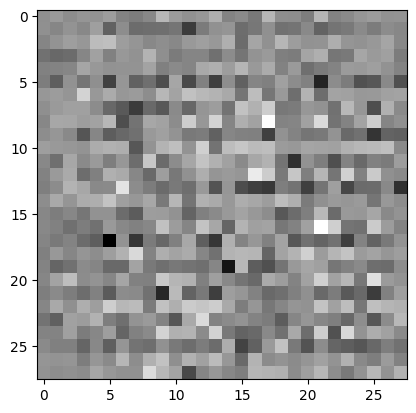

In [12]:
# using the untrained generator to generate an image from random noise
generator = make_generator_model()  # Create an instance of the generator model

noise = tf.random.normal([1, 100])  # Generate a random noise vector of shape (1, 100)
# The shape (1, 100) means 1 sample with 100 features, where the values are drawn from a normal distribution

generated_image = generator(noise, training=False)
# Pass the noise vector through the generator model to produce an image
# Set training=False to indicate that we are in inference mode (not training mode)

# Display the generated image using matplotlib
plt.imshow(generated_image[0, :, :, 0], cmap='gray')
# generated_image[0, :, :, 0] selects the first (and only) image in the batch
# [0, :, :, 0] means:
# - 0: selects the first image in the batch (since batch size is 1)
# - :: selects all rows (height) of the image
# - :: selects all columns (width) of the image
# - 0: selects the first channel of the image (since it's a grayscale image, there's only one channel)
# cmap='gray' specifies that the image should be displayed in grayscale


In [13]:
def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64,(5,5), strides=(2,2), padding='same', input_shape=(28,28,1)))

  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (5,5), strides=(2,2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Flatten())
  model.add(layers.Dense(1))

  return model


In [14]:
# using the untrained discriminator to predict whether an image is real or fake
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


tf.Tensor([[-0.00123089]], shape=(1, 1), dtype=float32)


Loss and Optimizer

In [15]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

**Discrimnator Loss**

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [16]:
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

**Generator Loss**

The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, compare the discriminators decisions on the generated images to an array of 1s.

In [17]:
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.


In [18]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer =tf.keras.optimizers.Adam(1e-4)

**Saving the checkpoint**

In [19]:
# Directory where the checkpoint files will be saved
checkpoint_dir = './training_checkpoints'

# Creating the full file path for the checkpoints by combining the directory and the prefix "ckpt"
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

# Creating a checkpoint object to save and restore the state of the model and optimizers
checkpoint = tf.train.Checkpoint(
    generator_optimizer=generator_optimizer,         # Optimizer for the generator model
    discriminator_optimizer=discriminator_optimizer, # Optimizer for the discriminator model
    generator=generator,                             # The generator model
    discriminator=discriminator                      # The discriminator model
)

**Define the training Loop**

In [20]:
# Number of training epochs
EPOCHS = 100

# Dimension of the noise vector
noise_dim = 100

# Number of examples to generate at a time
num_examples_to_generate = 16

# Generate a tensor of shape [16, 100] with random values from a normal distribution
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Print the shape of the seed tensor
print(seed.shape)  # Output: (16, 100)


(16, 100)


The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [21]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    # Generate a batch of random noise vectors
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    # Record the operations for automatic differentiation
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate images using the generator model
        generated_images = generator(noise, training=True)

        # Get the discriminator's prediction on real images
        real_output = discriminator(images, training=True)
        # Get the discriminator's prediction on generated (fake) images
        fake_output = discriminator(generated_images, training=True)

        # Calculate the generator's loss using the fake output
        gen_loss = generator_loss(fake_output)
        # Calculate the discriminator's loss using the real and fake outputs
        disc_loss = discriminator_loss(real_output, fake_output)

    # Compute the gradients of the generator's loss with respect to the generator's variables
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients of the discriminator's loss with respect to the discriminator's variables
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply the computed gradients to update the generator's variables
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    # Apply the computed gradients to update the discriminator's variables
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


In [25]:
def train(dataset, epochs):
    # Loop over the number of epochs specified in EPOCHS
    for epoch in range(EPOCHS):
        # Record the start time of the epoch
        start = time.time()

        # Iterate over each batch of images in the dataset
        for image_batch in dataset:
            # Perform a single training step on the current batch of images
            train_step(image_batch)

        # Clear the current output to keep the display clean
        display.clear_output(wait=True)

        # Generate and save images to visualize the training progress
        generate_and_save_images(generator, epoch + 1, seed)

        # Save the model's state every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        # Print the time taken for the current epoch
        print('Time for epoch {} is {} sec'.format(epoch + 1, time.time() - start))

    # After all epochs are completed, clear the display again
    display.clear_output(wait=True)

    # Generate and save images to visualize the final output of the generator
    generate_and_save_images(generator, epochs, seed)


**Generate and save images**

In [23]:
def generate_and_save_images(model, epoch, test_input):
    """
    Generate images from the given model using the test input and save them as a PNG file.

    Parameters:
    - model: The generator model used to create images.
    - epoch: The current epoch number used for naming the saved file.
    - test_input: The input to the model for generating images.
    """

    # Generate predictions from the model using the test input
    predictions = model(test_input, training=False)

    # Create a new figure with a size of 4x4 inches
    fig = plt.figure(figsize=(4, 4))

    # Loop through each generated image in the predictions batch
    for i in range(predictions.shape[0]):
        # Create a subplot in a 4x4 grid for each image
        plt.subplot(4, 4, i + 1)  # 4x4 grid, i+1 specifies the position

        # Extract the i-th image from the predictions
        image = predictions[i, :, :, 0]  # Get the i-th image (all rows, all columns, 1 channel)

        # Scale the image from the range [-1, 1] to [0, 255]
        scaled_image = image * 127.5 + 127.5

        # Display the image in grayscale
        plt.imshow(scaled_image, cmap='gray')

        # Turn off the axis for a cleaner look
        plt.axis('off')

    # Save the generated images as a PNG file with the epoch number in the filename
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch), format='png')

    # Show the plot
    plt.show()


**Training the model**

Call the train() method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated images look like random noise. As training progresses, the generated digits will look increasingly real. After about 50 epochs, they resemble MNIST digits.

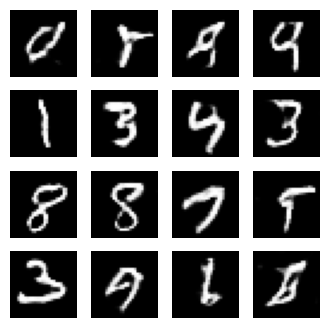

In [26]:
train(train_dataset, EPOCHS)

In [27]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

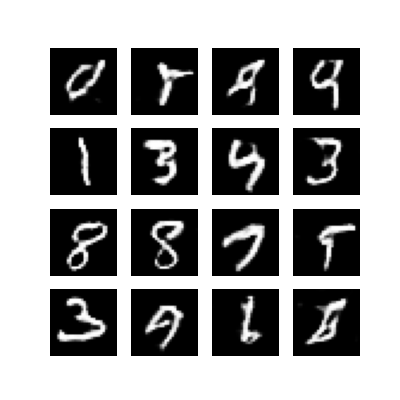

In [28]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)

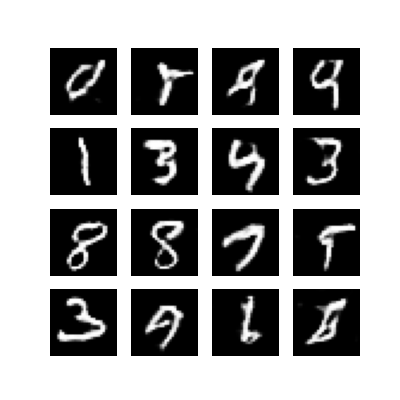

In [29]:
display_image(EPOCHS)

In [30]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

<ipython-input-30-56bb6d34be2e>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-30-56bb6d34be2e>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



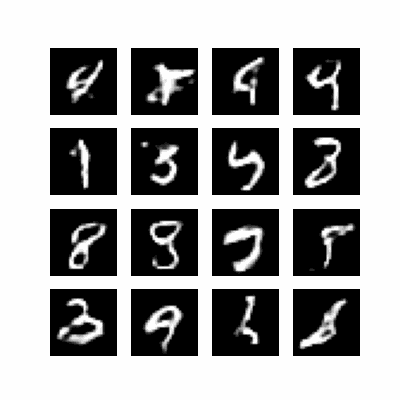

In [33]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)